In [141]:
import requests
from bs4 import BeautifulSoup
import re
from random import randint
from time import sleep
import nltk
import sqlite3
from datetime import datetime
from lxml import html

Job_Title = 'Data Analyst'
Locations = ['Vancouver, BC', 
             'Toronto, Canada', 
             'Hong Kong', 
             'Silicon Valley', 
             'Boston, US', 
             'London, UK', 
             'Raleigh-Durham, US',
             'Calgary, AB',
             'Victoria, BC',
             'Seattle, US'
            ]
URL_Links = ['https://ca.indeed.com/jobs?q=data+analyst&l=Vancouver%2C+BC&start=',
             'https://ca.indeed.com/jobs?q=data+analyst&l=Toronto%2C+ON&start=', 
             'https://hk.indeed.com/jobs?q=data+analyst&l=Hong+Kong&start=',
             'https://www.indeed.com/jobs?q=data+analyst&l=Silicon+Valley%2C+CA&start=',
             'https://www.indeed.com/jobs?q=data+analyst&l=Boston%2C+US&start=',
             'https://uk.indeed.com/jobs?q=Data+Analyst&l=London&start=',
             'https://www.indeed.com/jobs?q=data+analyst&l=Raleigh-Durham%2C+US&start=',
             'https://ca.indeed.com/jobs?q=data%20analyst&l=Calgary%2C%20AB&start=',
             'https://ca.indeed.com/jobs?q=data+analyst&l=Victoria%2C+BC&start=',
             'https://www.indeed.com/jobs?q=data+analyst&l=Seattle%2C+US&start='
            ]
# set up find pattern to extract portion of URL_Links starts with "https://"" and ends ".com/"
pattern = re.compile("(https://)(\\S*)(\\.com)")


PAGE = list(range(0, 10, 10))
#soup = BeautifulSoup(page.content, 'html.parser')


In [142]:
urls = []
job_links = []
search_Loc = []
searched_title_location = []
text = ''
i = 1


#Generate links job search pages
def get_links(PAGE):
    for i in range(len(Locations)):
        #loop thru the given cities
        for x in PAGE:
            #loop thru the jobs within page starting with 10, 20, 30... etc
            #form a list of links urls
            urls.append(URL_Links[i] + str(x))
            search_Loc.append(Locations[i])
    return search_Loc, urls

#connection to the Job Description database
def Database():
    global conn, cursor
    conn = sqlite3.connect('JobDescription.db')
    cursor = conn.cursor()
    conn.commit()
    
#write the data into the database
def AddNew(search, link, title, company, city, job_description, salary):
    Database()
    cursor.execute(
        "INSERT INTO `Jobs` (search, link, title, company, city, job_description, timestamp, salary) VALUES(?, ?, ?, ?, ?, ?, ?, ?)", 
        (search, link, title, company, city, job_description, datetime.now(), salary))
    conn.commit()
    print('Saved to Database!')
    cursor.close()
    conn.close()

#show time!
if __name__ == "__main__":
    
    #pass into the get_link function and get search location and links
    search_Loc, urls = get_links(PAGE)

    for url, search in zip(urls, search_Loc):
        print(search)
        print(url)
        text = ''
        text = url + ' ' + requests.get(url).text
        sleep(randint(1,4))
        soup = BeautifulSoup(text, 'html.parser')
        for item in soup.find_all('a', attrs = {'href': True, 
                                             'data-mobtk' : True, 
                                             'data-jk' : True, 
                                             'id': True }):
            matches = pattern.search(url).group(0)
            print (str(matches) + item['href'])
            sleep(randint(1,4))
            job_links.append(str(matches) + item['href'])
            searched_title_location.append(Job_Title + ' ' + search)
            print(len(job_links))
            #print(len(searched_title_location))
    for link, search_title_loc in zip(job_links, searched_title_location):
        try:
            sleep(randint(2,10))
            html_page = requests.get(link)
            text2 = html_page.text
            soup2 = BeautifulSoup(text2, 'html.parser')
            try:
                title = soup2.find_all("h1", class_="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title")[0].text.strip()
            except:
                title = 'NULL'
            try:
                company = soup2.find_all("div", class_="icl-u-lg-mr--sm icl-u-xs-mr--xs")[0].text.strip()
            except:
                company = 'NULL'
            try:
                job_description = soup2.find("div", attrs={"class":"jobsearch-jobDescriptionText","id":"jobDescriptionText"}).text
            except:
                job_description = 'NULL'

            try:
                salary = soup2.find("div", attrs={"class":"jobsearch-JobMetadataHeader-item"}).text
            except:
                salary = 'NULL'
                

            try:
                city = soup2.find_all("div",attrs={'class': 'icl-u-xs-mt--xs icl-u-textColor--secondary jobsearch-JobInfoHeader-subtitle jobsearch-DesktopStickyContainer-subtitle'})[0].find_all("div",attrs={'class': None})[0].text
            except:
                city = 'NULL'
            try:
                meta_content = soup2.find("meta", id='indeed-share-url').get('content')
            except:
                meta_content = 'NULL'
            print(str(title) + ' / ' + str(company) + ' / ' + str(city))
            Database()
            cursor.execute("SELECT * FROM `Jobs` WHERE `link`= " + '"' + meta_content + '"')
            if (cursor.fetchone() is None) and 'NULL' not in (meta_content, title, company, city, job_description):
                AddNew(str(search_title_loc), meta_content, title, company, city, job_description, salary)
        except:
            pass # doing nothing on exception

Vancouver, BC
https://ca.indeed.com/jobs?q=data+analyst&l=Vancouver%2C+BC&start=0
https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BDAtkAoZ8kh_xTc9tEKZUV0HqdactMIEvv3az5sbRcnLGHhxZ14JMew61IyNDggpLhlmQWLD1PxOW_flMbcVtYH9fnhC12bKgMZXyF4m2NPxAEPtPFuOzMmNiNXA_Z_cZa9LysZyFC4MPxhXUFUdpauU5SLIr-A4QdBU1HJb4jUGiWNd0GfPVswhkZjPf1WnD76VRLEk2S2BZWgrtPe2bh2X4JKrkYo8CGKqXlYfkVeplug0G4uqAJY9MweoITsYddomwrmcn4c-y2IitfHNxpLm2pYsnRXvIS7MvwqZxx8aovmHTqrT-3NJxUAjANfX-Hba2zdQdldUNR7UNm4Z1Jrxo3WdR74KIXLdel0lHOgTxHcqdKN7IQoyTrYBRY1lUBfJqKjO2U5ir5iDcy46FNf7wCaaUJLTcL8MUDT8o5E3ZBVWVQrnT68a_G786QhxM=&p=0&fvj=0&vjs=3
1
https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A7iX7kYfvtlMHlxHDh6MmTLoNS6xvZ6g6PWgekKeLr_PYw2bVnr6tGUKdPtDT27w4fn0ZSW_dZQas6hChGh3liQOwwjeFczoKftwwQ5zH2KbuC8w1qAw0CLaXNH_hrAm7aF9DWSCNpBbCATo6GzTHkG8moB_9skyGj7VXfnhwp0N0jP1HSmXkbGRlr8F6t6PNs1MKfUDGpMEJ3Fm-3GxIyInd1Qn_v7r_ce64MQm5sj26YIjeZzsbI-jFje1geM_nqDYfdiElTB3AZhhPQHzPPFuGqAMcCZ7rOBtWnaAIWCKCnbFQKpFqQUljnbriXkbXp9WvLsyaa13QFOamNC380GU78C

29
Hong Kong
https://hk.indeed.com/jobs?q=data+analyst&l=Hong+Kong&start=0
https://hk.indeed.com/rc/clk?jk=2514fd585ee9be3f&fccid=5386281035076fdf&vjs=3
30
https://hk.indeed.com/rc/clk?jk=d52801aad56f16e6&fccid=f770da67b3b51c62&vjs=3
31
https://hk.indeed.com/rc/clk?jk=bd9aaf0a99fbdd7d&fccid=941c4fb004be80b8&vjs=3
32
https://hk.indeed.com/rc/clk?jk=13818bbe56ccbdae&fccid=f770da67b3b51c62&vjs=3
33
https://hk.indeed.com/rc/clk?jk=8bad2103045a8a54&fccid=2c27a35d679f26ae&vjs=3
34
https://hk.indeed.com/rc/clk?jk=2ff35d7f5324eeda&fccid=68928fde239d7c6b&vjs=3
35
https://hk.indeed.com/rc/clk?jk=c5d4b5315df50272&fccid=09e12974662898fb&vjs=3
36
https://hk.indeed.com/rc/clk?jk=61ee9f6177c610aa&fccid=58d0c876bf495faa&vjs=3
37
https://hk.indeed.com/rc/clk?jk=fc6e129e17496b2e&fccid=a63351e7462c68b1&vjs=3
38
https://hk.indeed.com/rc/clk?jk=599b9cf22aaafdaf&fccid=2c27a35d679f26ae&vjs=3
39
https://hk.indeed.com/rc/clk?jk=c2d966680666b8dc&fccid=5dfe5e046f0fbbd0&vjs=3
40
https://hk.indeed.com/rc/clk?jk=81

64
https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AK9q-cQKnf3DfHR64avwMzIcXVxwit4OIbhS0fZYeNhvY1IRVnFZKIZbSdKeT9Hyp7O8Q3fTQzYPDKu8_sHbDDci88CpxTZwkPpDMVG3YMUtGZzHBMnTu3th97yTVdcfsKHGvBTf5TdiOVzApu2U3YLQTF2FQhQu2iEPqbVjwfYC2czxeZBSQEM6oqfWzExl9e7R9NrS0wDUFQzG3bC2I8JnokMOxpxBgsiqspSszpCSSV9LN88KTO4FIwfANmnXBGoSUYvQmGazAqJYeFl5eUUPgPPtNG5sjjVt2aYkrKh8cGWEqvXJbvmW-VpoUoMNiLigGnfeANGkJ9cG2_Jv8xJz-rfliUXXU4QcNDbYryhhvU3lU1nqabO_2lG12fDP20S1CxfC5MJxkt0D6SHfbB6_5I2i-3KWWNKD5RdIDXUSz_jQemr3DLcjLlgSQT9CxyPuOpNfR-hITBG1M77wG5eCtm-JxXaRmtryWw_bolwsKqlooo2437vncdDzmvTokNZGpfVYlaoxOlaxHCIcUREaD58gNdARMau2hu1B0_yHhPnIIUXHg2NNxzOI7OqX4gQVL1AMSFNL-_DW5EtKxc&p=5&fvj=0&vjs=3
65
https://www.indeed.com/rc/clk?jk=8c74516daef6160a&fccid=9917de3c28f569f6&vjs=3
66
https://www.indeed.com/rc/clk?jk=a62e90004579a7dd&fccid=5857baa4ae63d4ab&vjs=3
67
https://www.indeed.com/rc/clk?jk=51bafe859a8b28f3&fccid=10b5c722d846df43&vjs=3
68
https://www.indeed.com/rc/clk?jk=f02f56676b0f007a&fccid=353eb997fc901045&vjs=3
69

107
https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AWNbo3wFY2NxIdv0scf94Xveoqr71deizt6pt4QRpWd9DBfgcGhgVjxyyL2OzcpWbBTRC9npSOsfqK4M0ivUzoLj0PYKx8JQRpEGeveaibz9mXofSv8e0O8w-fDSLrUSmI6rRft2vrzR6ZNSIKkfWrjFrNtkrXq9vEfKfx9_FHe8Y8Pj75Kpe90e0KbpXQuduf-7rnlGWyCJ7aad4B0Ya1KEUDIM9B_NKsc_ENEGxPOJOjvFI6yIs6plV-uPxuGlP2zEbBW2rO-200NhbaWsm8fNknLVcqaGHNJM7kMwgVZwVPloyeglsb84GaAJQ26-wE0lL76HjL7dIrV8LKNGj-7lPFgBkm8_zzLNeTz0Txx4bDs5m3TIdoOM1haYut3tL2y7VwcWSQ78C8dOQgm4SIRLwvqM7xrCxnjCFOatbuBUgMRx-CrOC5gFrA1pKxIFwVoO5gBiUwbkjP3b8LBVMGw2FzxLUQegt6YTQvn57jRSW7VPGWx6OglCRsRgJ4xuA=&p=3&fvj=1&vjs=3
108
https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DQQnUBuQBSuyaIQhpC59TW7hrTbBg8v-nGtzzV8dunbSOYe1hEeg3Jz68ZjAGo08HeCU5Bi2_hmvEZ3FKIskMvC-GfPaTUKaztbhZW2KeHglFC1jYUcEWX6ukdLNn_MX2Fzwkr5GhhRlIZGSsdzmYAoHtksnrYux5ZFnkHuSCdJqxwlLNxty7KC8kih3krwrMyvrIF0G5dXn7Kaijbpd2wz0PfJldq2ShktOUnPmJIxT8U1AXfkaMXYVdzIhNkcStB_h3KLf7xCJYS_l9rrWCfvKh7_FmXEBlVE6TAiocn9SwdObCUGQv_h3WuX2ngGvbSuyFxDVhyhiRDiO5wwLV8a_UToqOzogF-KjVM2

136
https://www.indeed.com/rc/clk?jk=d6221c263f6d5a7d&fccid=142783ac2edbe56b&vjs=3
137
https://www.indeed.com/rc/clk?jk=a6b0b968f077e96a&fccid=734cb5a01ee60f80&vjs=3
138
https://www.indeed.com/rc/clk?jk=a6df7777f11a9dcc&fccid=ad777e6929703800&vjs=3
139
https://www.indeed.com/rc/clk?jk=5b508f246f7a4cca&fccid=734cb5a01ee60f80&vjs=3
140
https://www.indeed.com/company/Summit-Capital-Partners-LLC/jobs/Data-Analyst-11ce8be1a2fd6157?fccid=e8c14e0651b47f13&vjs=3
141
https://www.indeed.com/rc/clk?jk=dc158110183c40a3&fccid=e33b96c6fd155ebf&vjs=3
142
https://www.indeed.com/rc/clk?jk=405921a07dca1992&fccid=142783ac2edbe56b&vjs=3
143
https://www.indeed.com/rc/clk?jk=b544612ca7da3b5d&fccid=40104bf954aa3dbf&vjs=3
144
https://www.indeed.com/rc/clk?jk=788f6f00a185bd7a&fccid=eb86c6762e657abf&vjs=3
145
https://www.indeed.com/rc/clk?jk=e11ec3c0b568952a&fccid=734cb5a01ee60f80&vjs=3
146
https://www.indeed.com/rc/clk?jk=7bde4330645769f4&fccid=ccaacd9cca9fffe8&vjs=3
147
https://www.indeed.com/company/LatentVi

Settlement Analyst / Spirit Omega / Calgary, AB
Saved to Database!
Accountant/Settlement Analyst / Kelly Services / Calgary, AB
Saved to Database!
Data Analyst II / TES - The Employment Solution / Calgary, AB
SETTLEMENT ANALYST / Bowen Group / Calgary, AB
Saved to Database!
Sr. Business Analyst / Robert Half / Calgary, AB
Saved to Database!
DATA ANALYST / Bowen Group / Calgary, AB
Help Desk Analyst I / Robert Half / Calgary, AB
Settlement Analyst - 318606 / Procom / Calgary, AB
Saved to Database!
Junior Data Analyst / FYidoctors / Calgary, AB
Analyst - Data & Analytics / WestJet / Calgary, AB
Saved to Database!
Data Analyst / Function Group Analytics Inc. / Calgary, AB
Control Room Data Analyst / Hifi Engineering / Calgary, AB
Operations Analyst / Quantifi / Calgary, AB
Saved to Database!
Data Analyst / Epic / Victoria, BC
Inventory Data Analyst / CAPITAL IRON DOWNTOWN VICTORIA / Victoria, BC
Data Analyst, Regional Quality Improvement / Island Health / Victoria, BC
Business Analyst / B

In [80]:
#filter the df to one candidate, and create a list of responses from them
text = df[df.speaker=='biden'].speech.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

Note: you may need to restart the kernel to use updated packages.


In [137]:
from sqlalchemy import create_engine
cnx = create_engine('sqlite:///JobDescription.db').connect()
df_all = pd.read_sql_table('Jobs', cnx)
df = df_all[df_all.title.str.contains("Data Analyst")]
df

,id,search,link,title,company,city,job_description,Salary,timestamp
1,1,"Data Analyst Vancouver, BC",https://ca.indeed.com/viewjob?from=appsharedro...,Data Analyst,7X Powered Inc.,"Vancouver, BC",Data Analyst Are you a data junkie? Do you lov...,"Full-time, Permanent",2021-06-27 01:41:04.746677
4,4,"Data Analyst Vancouver, BC",https://ca.indeed.com/viewjob?from=appsharedro...,Business Data Analyst,Robert Half,"Vancouver, BC","Our client, a global public company is seeking...",NULL,2021-06-27 01:41:16.951802
5,5,"Data Analyst Vancouver, BC",https://ca.indeed.com/viewjob?from=appsharedro...,MARI - Score Form Data Analyst (Volunteer),MARI (Misdiagnosis Association and Research In...,"Vancouver, BC",Company description Be Part of Our Team Today!...,Part-time,2021-06-27 01:41:20.956537
6,6,"Data Analyst Vancouver, BC",https://ca.indeed.com/viewjob?from=appsharedro...,Junior Data Analyst,Able Group,"Surrey, BC",Able Group is looking to hire an enthusiastic ...,"Full-time, Part-time, Permanent",2021-06-27 01:41:25.986628
9,9,"Data Analyst Vancouver, BC",https://ca.indeed.com/viewjob?from=appsharedro...,"Data Analyst, Risk",Square,"Vancouver, BC",Company Description\nSquare builds common busi...,NULL,2021-06-27 01:41:33.251793
...,...,...,...,...,...,...,...,...,...
1211,1226,Data Analyst Silicon Valley,https://www.indeed.com/viewjob?from=appsharedr...,Research Data Analyst 2,Stanford University,"Stanford, CA",The Brain Dynamics Lab (BDL) housed within the...,Full-time,2021-08-22 12:42:49.989906
1212,1227,"Data Analyst London, UK",https://uk.indeed.com/viewjob?from=appsharedro...,Junior Business Intelligence / Data Analyst,Siemens Mobility Limited,London,We are currently looking for a Junior Business...,NULL,2021-08-22 12:43:41.336592
1213,1228,"Data Analyst Raleigh-Durham, US",https://www.indeed.com/viewjob?from=appsharedr...,Data Analyst,Blue Cross and Blue Shield of North Carolina,"Durham, NC","Responsible for providing analytic support, wh...",Full-time,2021-08-22 12:46:29.534841
1215,1230,"Data Analyst Seattle, US",https://www.indeed.com/viewjob?from=appsharedr...,Data Analyst,"Raybeam, Inc.","Seattle, WA","This is a remote position based in Seattle, WA...",Full-time,2021-08-22 12:49:53.418292


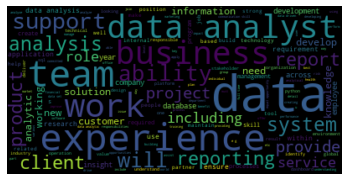

In [138]:
#filter the df to one candidate, and create a list of responses from them
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
text = df.job_description.tolist() 
#text = df[df.search=='Data Analyst Seattle, US'].job_description.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [107]:
extra_stopwords = ['experience', 'ability','work','team','business', 'data', 'will','analysis','analyst', 'support', 'system']

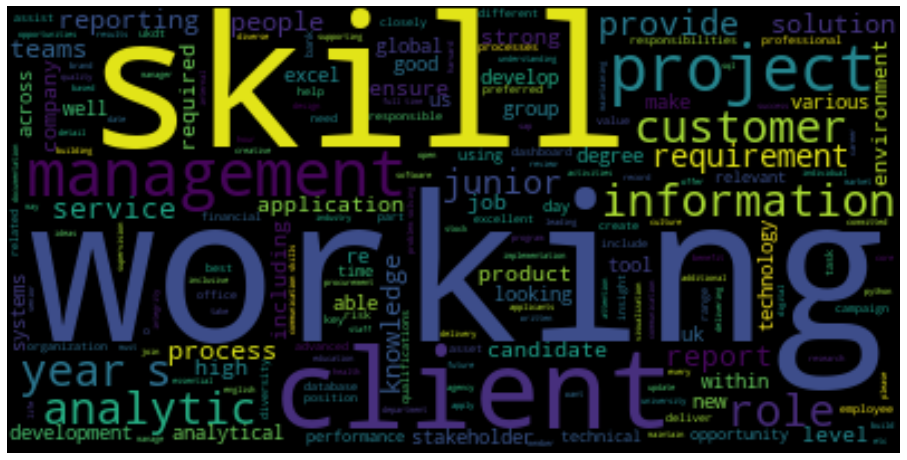

In [134]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = set.union(STOPWORDS,extra_stopwords),
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=[16, 12])
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [118]:
?WordCloud